## IPL Data Set

**Task:** Perform EDA Exploratory Data Analysis on the data set

- Link to data set
https://www.kaggle.com/ramjidoolla/ipl-data-set

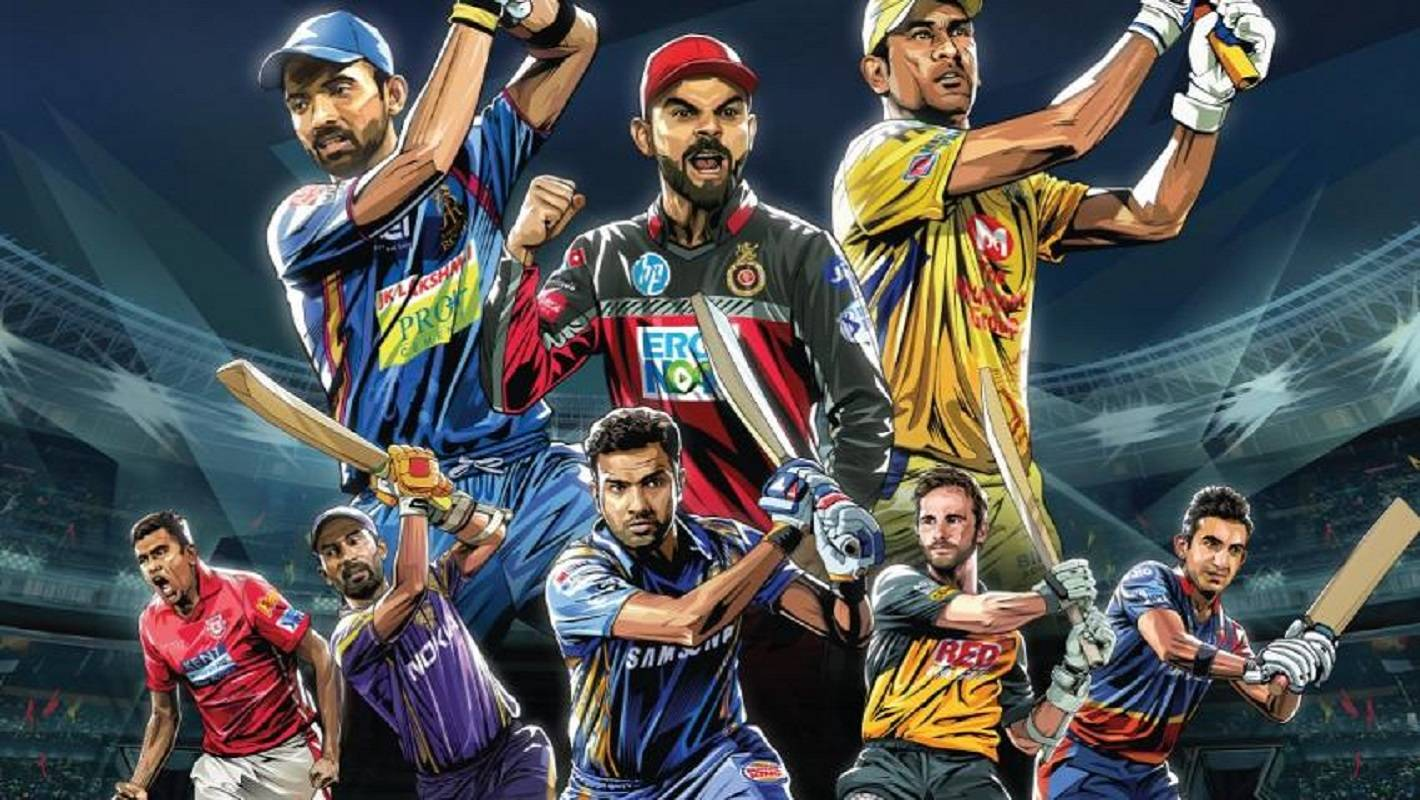

In [1]:
from IPython.display import Image
Image("ipl.jpg")

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India usually contested between March and May of every year by eight teams representing eight different cities or states in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2007. The IPL has an exclusive window in ICC Future Tours Programme.

The IPL is the most-attended cricket league in the world and in 2014 was ranked sixth by average attendance among all sports leagues.In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube.The brand value of the IPL in 2019 was ₹475 billion, according to Duff & Phelps. According to BCCI, the 2015 IPL season contributed ₹11.5 billion to the GDP of the Indian economy.

### Dataset Information

This Notebook contains 6 datasets. The information about all of them are as follows:-

|**Dataset**|**Content**|
|----|----|
|matches.csv|This dataset contains information about details of every ipl matches e.g teams,city and stadium in which match was played,name of all the umpires, winner of toss and toss decision and also the winner.|
|teamwise_home_and_away.csv|This dataset contains information of how many matches does a team won while playing in home stadium and away and their percentage win-loss.|
|deliveries.csv|This dataset contains information about the details of every deliveries bowled in ipl.|
|most_runs_average_strikerate.csv|This dataset has the details about the runs scored by every batter along with their strike rate and average.|
|teams.csv|This dataset has the name of all the teams that have played in the history of ipl.|
|Players.xlsx|This dataset has the details of the player including their dob,batting_hand and the country they belonged.|


There are few changes that we can see in the names of the teams, in these datasets. They are:
- Deccan Chargers is renamed to Sunrisers Hyderabad 
- Delhi Daredevils is renamed to Delhi Capitals
- Pune Warriors is renamed to Rising Pune Supergiants.

## ***Importing necessary libraries***
The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## ***Importing all the 6 datasets***

In [3]:
match= pd.read_csv('matches.csv', index_col='id', parse_dates=True)
home_and_away= pd.read_csv('teamwise_home_and_away.csv')
delivery= pd.read_csv('deliveries.csv')
runs_avg_strikerate= pd.read_csv('most_runs_average_strikerate.csv')
team= pd.read_csv('teams.csv')
player= pd.read_excel('Players.xlsx', parse_dates=True)

## ***Inspecting the datasets***

### **1. matches.csv**

In [4]:
# Viewing the top 5 values of the dataset
match.head()

# in order to view bottom 5 entries, we can do
#df.tail()

#in order to view more than 5 entries, we can enter any integer value into '()'.
#Ex: df.head(10) or df.tail(15), etc

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
# Now let us check for the shape of the dataset and also that are any null values present in our dataset.
# For that,

print('shape of the dataset=', match.shape)

print(' \nThe null count of each column of the dataset are as follows:')
match.isnull().sum()

shape of the dataset= (756, 17)
 
The null count of each column of the dataset are as follows:


Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

- Here we can observe that there are 756 rows and 17 columns present in the dataset.
- We can also see that there are a few null values present in the dataset. Later, if need be, we can treat them, as required.

In [6]:
match['team1'].value_counts()
#match['team2'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [7]:
# Function to identify numeric features:

def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()
    
numeric_columns = numeric_features(match)
print("Numerical Features:")
print(numeric_columns)

print("===="*20)




# Function to identify categorical features:

def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(match)
print("Categorical Features:")
print(categorical_columns)

print("===="*20)



# Function to check the datatypes of all the columns:

def check_datatypes(dataset):
    return dataset.dtypes

print("Datatypes of all the columns:")
check_datatypes(match)

Numerical Features:
    dl_applied  win_by_runs  win_by_wickets
id                                         
1            0           35               0
2            0            0               7
3            0            0              10
4            0            0               6
5            0           15               0
Categorical Features:
      Season       city        date                        team1  \
id                                                                 
1   IPL-2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
2   IPL-2017       Pune  06-04-2017               Mumbai Indians   
3   IPL-2017     Rajkot  07-04-2017                Gujarat Lions   
4   IPL-2017     Indore  08-04-2017       Rising Pune Supergiant   
5   IPL-2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                          team2                  toss_winner toss_decision  \
id                                                                           
1   Royal Challen

Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

### **2. teamwise_home_and_away.csv**

In [8]:
home_and_away.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


In [9]:
print('shape of the dataset=', home_and_away.shape)

print(' \nThe null count of each column of the dataset are as follows:')
home_and_away.isnull().sum()

shape of the dataset= (14, 7)
 
The null count of each column of the dataset are as follows:


team                   0
home_wins              0
away_wins              0
home_matches           0
away_matches           0
home_win_percentage    0
away_win_percentage    0
dtype: int64

- Here we can observe that there are no null values present in our dataset.

In [10]:
# Function to identify numeric features:

def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()
    
numeric_columns = numeric_features(home_and_away)
print("Numerical Features:")
print(numeric_columns)

print("===="*20)




# Function to identify categorical features:

def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(home_and_away)
print("Categorical Features:")
print(categorical_columns)

print("===="*20)



# Function to check the datatypes of all the columns:

def check_datatypes(dataset):
    return dataset.dtypes

print("Datatypes of all the columns:")
check_datatypes(home_and_away)

Numerical Features:
   home_wins  away_wins  home_matches  away_matches  home_win_percentage  \
0          5          5             8             8            62.500000   
1         58         51           101            86            57.425743   
2         51         49            89            75            57.303371   
3          3          7             6            10            50.000000   
4         30         28            63            45            47.619048   

   away_win_percentage  
0            62.500000  
1            59.302326  
2            65.333333  
3            70.000000  
4            62.222222  
Categorical Features:
                     team
0  Rising Pune Supergiant
1          Mumbai Indians
2     Chennai Super Kings
3          Delhi Capitals
4     Sunrisers Hyderabad
Datatypes of all the columns:


team                    object
home_wins                int64
away_wins                int64
home_matches             int64
away_matches             int64
home_win_percentage    float64
away_win_percentage    float64
dtype: object

### **3. deliveries.csv**

In [11]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
print('shape of the dataset=', delivery.shape)

print(' \nThe null count of each column of the dataset are as follows:')
delivery.isnull().sum()

shape of the dataset= (179078, 21)
 
The null count of each column of the dataset are as follows:


match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

- Here we can see that there are 179078 rows and 21 columns in our dataset.
- The columns `player_dismissed`, `dismissal_kind` and `fielder` are almost empty. So we can straight away drop them. But we will keep them for now.

In [13]:
# Function to identify numeric features:

def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()
    
numeric_columns = numeric_features(delivery)
print("Numerical Features:")
print(numeric_columns)

print("===="*20)




# Function to identify categorical features:

def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(delivery)
print("Categorical Features:")
print(categorical_columns)

print("===="*20)



# Function to check the datatypes of all the columns:

def check_datatypes(dataset):
    return dataset.dtypes

print("Datatypes of all the columns:")
check_datatypes(delivery)

Numerical Features:
   match_id  inning  over  ball  is_super_over  wide_runs  bye_runs  \
0         1       1     1     1              0          0         0   
1         1       1     1     2              0          0         0   
2         1       1     1     3              0          0         0   
3         1       1     1     4              0          0         0   
4         1       1     1     5              0          2         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  
0           0  
1           0  
2           4  
3           0  
4           2  
Categorical Features:
        

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

### **4. most_runs_average_strikerate.csv**

In [14]:
runs_avg_strikerate.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [15]:
print('shape of the dataset=', runs_avg_strikerate.shape)

print(' \nThe null count of each column of the dataset are as follows:')
runs_avg_strikerate.isnull().sum()

shape of the dataset= (516, 6)
 
The null count of each column of the dataset are as follows:


batsman           0
total_runs        0
out               0
numberofballs     0
average          34
strikerate        0
dtype: int64

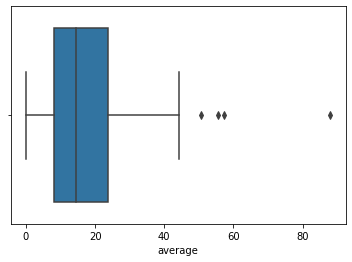

In [16]:
#sns.distplot(runs_avg_strikerate['average'])
#runs_avg_strikerate.describe()
sns.boxplot(runs_avg_strikerate['average'])

- Here we can see that there are 516 rows and 6 columns present in our dataset.
- We can also see that there are 34 null values in the `average` column of our dataset.
- Also, the column values are somewhat right skewed. So, we can fill the null values instead of removing them completely.
- From the bpxplot we can see that there are few outlies present in the dataset. So we can fill the null values by the median value, as it is not affected by the outlier.

In [17]:
runs_avg_strikerate.fillna(runs_avg_strikerate['average'].median(), axis=1, inplace=True)

In [18]:
runs_avg_strikerate.isnull().sum()

batsman          0
total_runs       0
out              0
numberofballs    0
average          0
strikerate       0
dtype: int64

In [19]:
# Function to identify numeric features:

def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()
    
numeric_columns = numeric_features(runs_avg_strikerate)
print("Numerical Features:")
print(numeric_columns)

print("===="*20)




# Function to identify categorical features:

def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(runs_avg_strikerate)
print("Categorical Features:")
print(categorical_columns)

print("===="*20)



# Function to check the datatypes of all the columns:

def check_datatypes(dataset):
    return dataset.dtypes

print("Datatypes of all the columns:")
check_datatypes(runs_avg_strikerate)

Numerical Features:
   total_runs  out  numberofballs    average  strikerate
0        5426  152           4111  35.697368  131.987351
1        5386  160           3916  33.662500  137.538304
2        4902  161           3742  30.447205  130.999466
3        4717  114           3292  41.377193  143.286756
4        4601  137           3665  33.583942  125.538881
Categorical Features:
     batsman
0    V Kohli
1   SK Raina
2  RG Sharma
3  DA Warner
4   S Dhawan
Datatypes of all the columns:


batsman           object
total_runs         int64
out                int64
numberofballs      int64
average          float64
strikerate       float64
dtype: object

### **5. teams.csv**

In [20]:
team.head()

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions


- This dataset only has names of the teams in IPL. So no further information can be drawn here.

### **6. Players.xlsx**

In [21]:
player.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [22]:
print('shape of the dataset=', player.shape)

print(' \nThe null count of each column of the dataset are as follows:')
player.isnull().sum()

shape of the dataset= (566, 5)
 
The null count of each column of the dataset are as follows:


Player_Name       0
DOB              95
Batting_Hand      3
Bowling_Skill    64
Country          95
dtype: int64

- We don't know yet, if we will require this dataset in our EDA further.
- So we can keep it as it is, and can modify the dataset, if needed.

## ***Exploratory Data Analysis (EDA)***

#### **1. Total wins by every teams so far**

In [23]:
match['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

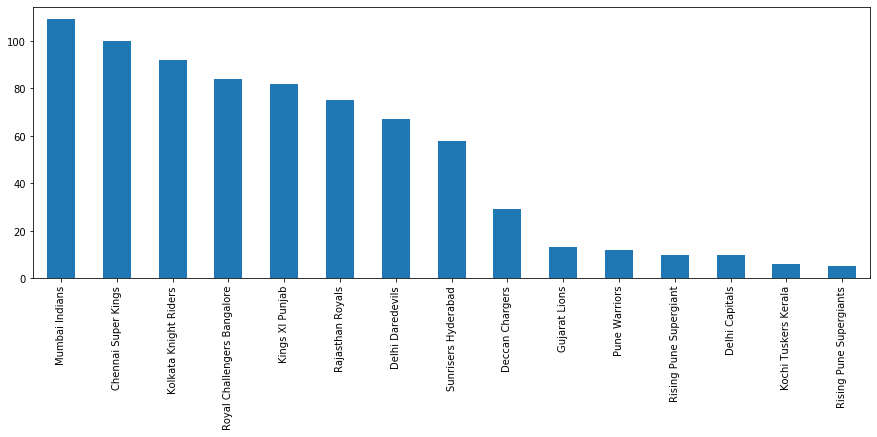

In [24]:
plt.figure(figsize=(15,5))
match_wins=match['winner'].value_counts()
match_wins.plot.bar()

- From the above plot, we can see that maximum number of matches are won by **Mumbai Indians** according to this dataset, that contains the information from **2008 to 2019**.

#### **2. Top 10 Man of the matches so far**

In [25]:
match['player_of_match'].value_counts()[0:10]

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

In [26]:
match['player_of_match'].value_counts()[0:5].keys()

Index(['CH Gayle', 'AB de Villiers', 'MS Dhoni', 'DA Warner', 'RG Sharma'], dtype='object')

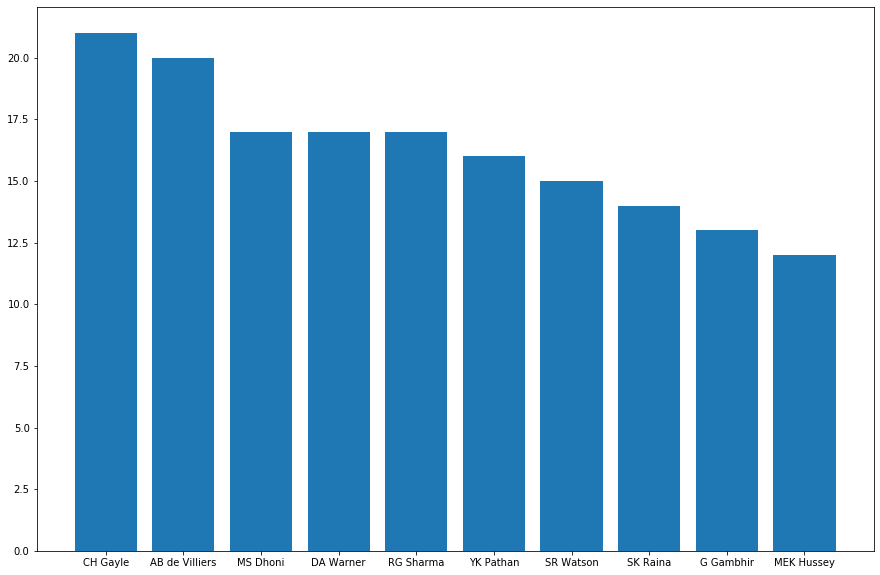

In [27]:
plt.figure(figsize=(15,10))
plt.bar(list(match['player_of_match'].value_counts()[0:10].keys()), list(match['player_of_match'].value_counts()[0:10]))
plt.show()

- From the above plot, we can see that **Chris Gayle**, aka CH Gayle has been declared player of the match the most of the time, from 2008 to 2019

#### **3. Top cities in which matches were played**

In [28]:
match['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Port Elizabeth      7
Abu Dhabi           7
Cuttack             7
Ranchi              7
Cape Town           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
East London         3
Nagpur              3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

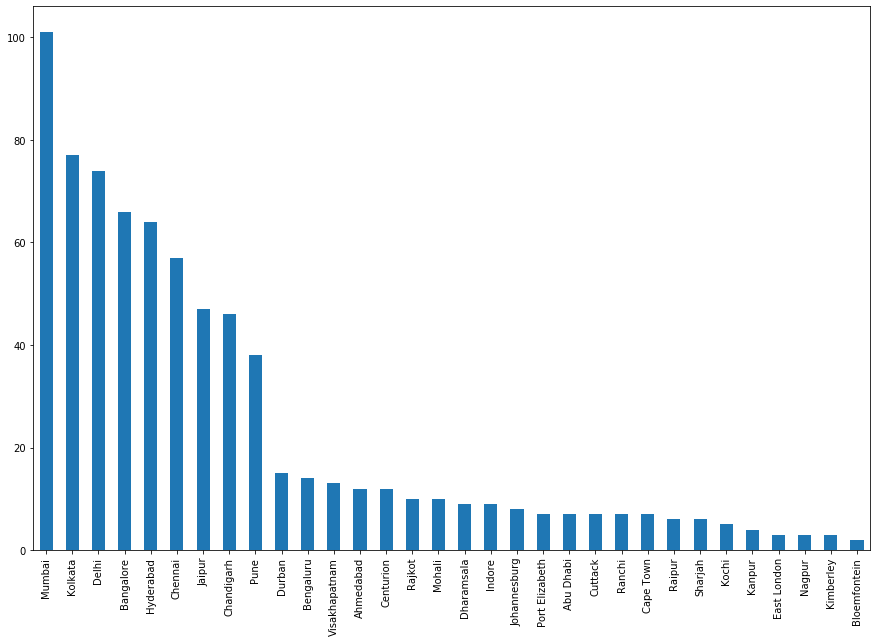

In [29]:
plt.figure(figsize=(15,10))
match['city'].value_counts().plot.bar()

- From the above graph, we can see that **Mumbai** is the city where most of the matches were played, followed by **Kolkata**.

#### **4. Frequency of the result column**

In [30]:
match['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

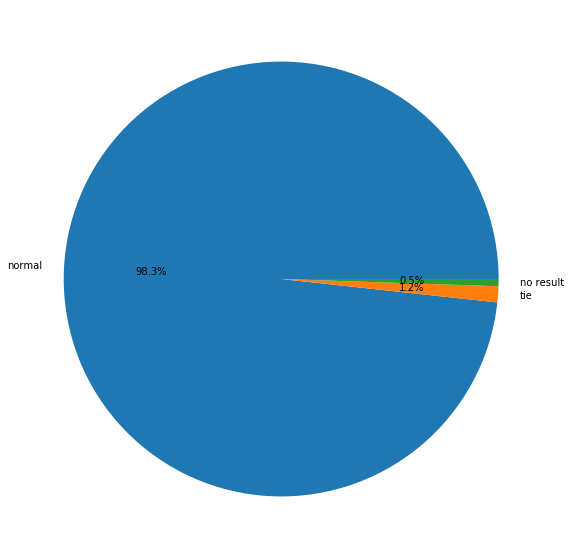

In [31]:
plt.figure(figsize=(15,10))
plt.pie(list(match['result'].value_counts()), labels= list(match['result'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

- Here we can see that 98.3% of the times, the result of the match was normal.
- 1.2% of the time, the match was a tie.
- 0.5% of the time, there was no result of the match. This may have been due to cancellation of the match, with any reason.

#### **5. Total matches played by team so far**

In [32]:
total_match=match['team1'].value_counts()+match['team2'].value_counts()
total_match.sort_values(ascending=False)

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          16
Delhi Capitals                  16
Rising Pune Supergiants         14
Kochi Tuskers Kerala            14
dtype: int64

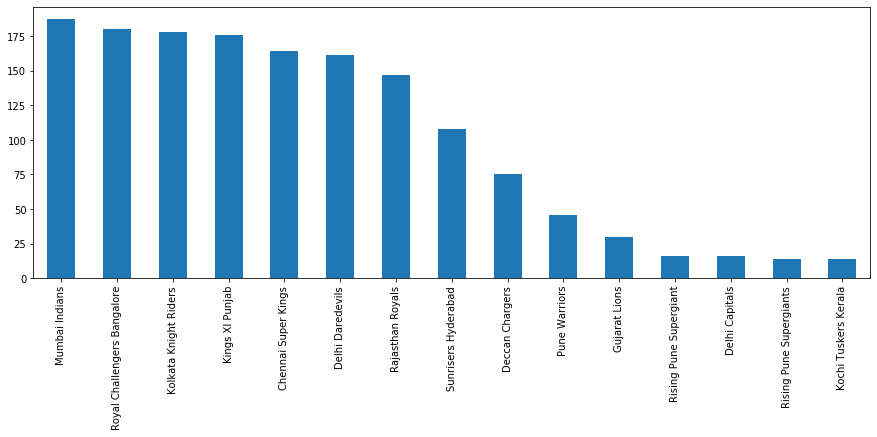

In [33]:
plt.figure(figsize=(15,5))
total_match.sort_values(ascending=False).plot.bar()

- This plot shows that **Mumbai Indians** have played most number of matches, followed by **Royal Challengers Bangalore**.
- Also, the least matches are played by **Rising Pune Supergiants** and **Kochi Tuskers Kerala**. 

#### **6. Total number of umpires so far (Top 20)**

In [34]:
umpires= match['umpire1'].value_counts()+match['umpire2'].value_counts()+match['umpire3'].value_counts()
umpires.sort_values(ascending= False)[0:20]

S Ravi                   114.0
C Shamshuddin             83.0
Nitin Menon               52.0
Anil Chaudhary            30.0
O Nandan                  26.0
Bruce Oxenford            22.0
Yeshwant Barde            19.0
Anil Dandekar             19.0
Nigel Llong               16.0
Vineet Kulkarni           16.0
Chris Gaffaney            15.0
KN Ananthapadmanabhan     15.0
Rod Tucker                14.0
Kumar Dharmasena           9.0
Ian Gould                  9.0
K Ananthapadmanabhan       8.0
A Nanda Kishore            8.0
Ulhas Gandhe               7.0
Nanda Kishore              6.0
A Deshmukh                 NaN
dtype: float64

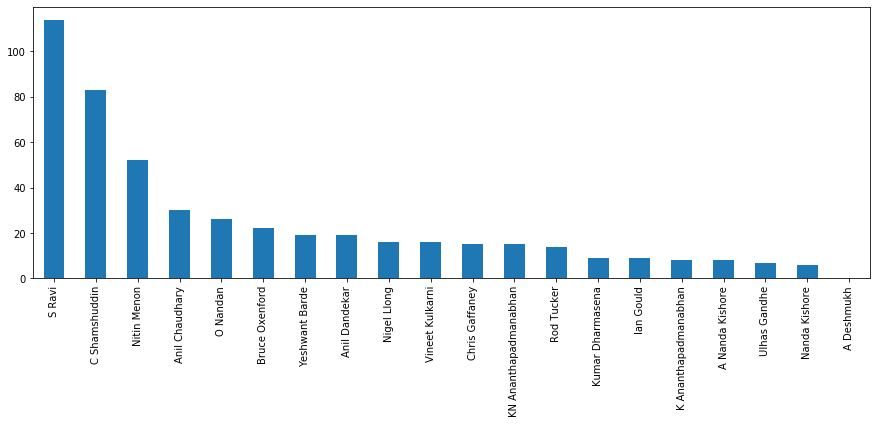

In [35]:
plt.figure(figsize=(15,5))
umpires.sort_values(ascending=False).head(20).plot.bar()

- Umpire **S Ravi** has capped most matches as umpire with 114 matches ,followed by **C Shamshuddin** with 83 matches.

#### **7. Wins by biggest margin of runs**

In [36]:
big_mar= match.sort_values('win_by_runs',ascending = False).reset_index(drop = True)
big_mar = big_mar[:10]
big_mar = big_mar[['winner','win_by_runs']]
print(big_mar)

                        winner  win_by_runs
0               Mumbai Indians          146
1  Royal Challengers Bangalore          144
2        Kolkata Knight Riders          140
3  Royal Challengers Bangalore          138
4  Royal Challengers Bangalore          130
5          Sunrisers Hyderabad          118
6              Kings XI Punjab          111
7             Rajasthan Royals          105
8               Mumbai Indians          102
9               Mumbai Indians           98


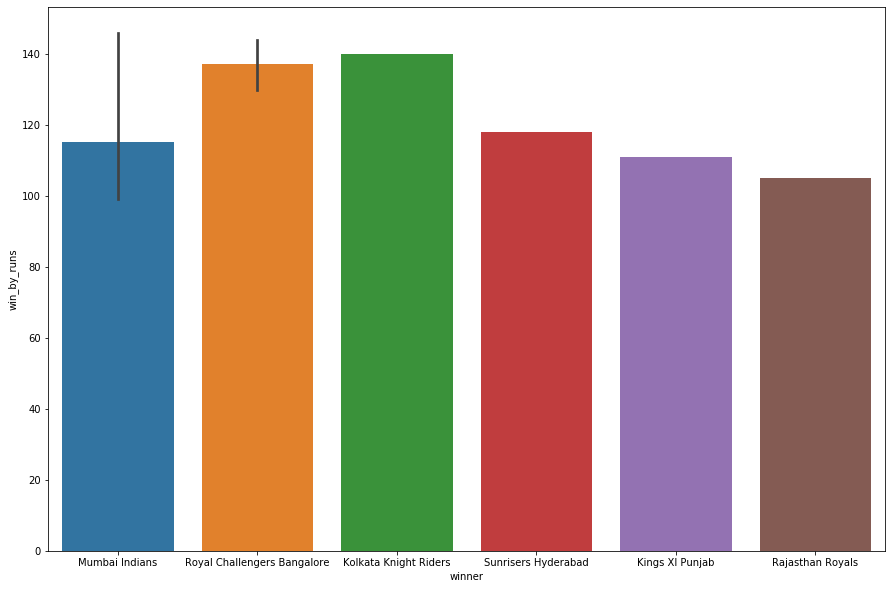

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(x= big_mar['winner'], y= big_mar['win_by_runs'])

- From the above plot we can see that **Mumbai Indians** is the team, that has won by maximum number of runs.
- This is also evident as **MI** is our most winning team.

#### **8. Best Fielder**

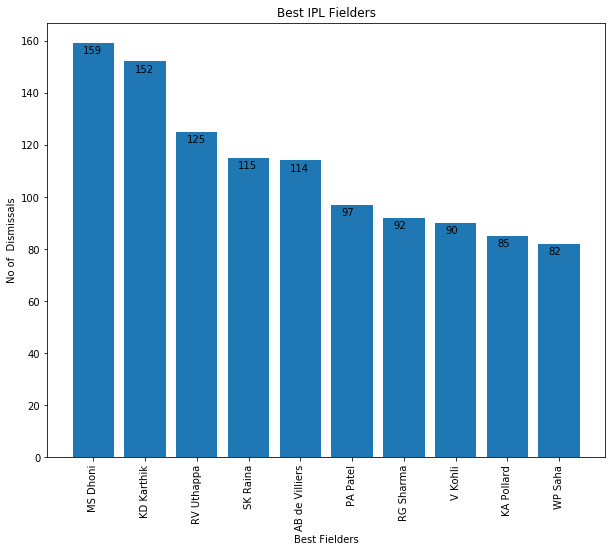

In [39]:
bf = delivery.groupby('fielder').apply(lambda x : x).reset_index()
bf = delivery.groupby('fielder').count() 
bf = bf.dismissal_kind.reset_index(name='Dismissals')
bf = bf.sort_values(by='Dismissals',ascending=False)
bf = bf[0:10]

plt.figure(figsize=(10,8))
plt.title("Best IPL Fielders")
plt.bar(bf.fielder , bf.Dismissals)
plt.xlabel("Best Fielders")
plt.ylabel("No of  Dismissals")
count = 0
for i in bf.Dismissals:
    plt.text(count-0.2,i-4,str(i))
    count+=1
plt.xticks(rotation = 90)
plt.yticks()
plt.show()

- From the above plot, we can see that **MS Dhoni** is our best fielder, followed by **KD Karthik**.

#### **9. Most successful team in home condition**

In [40]:
home_wins=home_and_away[['team','home_win_percentage']]
home_wins.sort_values('home_win_percentage',ascending=False)

,team,home_win_percentage
0,Rising Pune Supergiant,62.500000
1,Mumbai Indians,57.425743
2,Chennai Super Kings,57.303371
3,Delhi Capitals,50.000000
4,Sunrisers Hyderabad,47.619048
5,Rajasthan Royals,43.283582
6,Deccan Chargers,41.860465
7,Kings XI Punjab,41.758242
8,Royal Challengers Bangalore,41.176471
9,Kolkata Knight Riders,40.963855


<Figure size 1080x720 with 0 Axes>

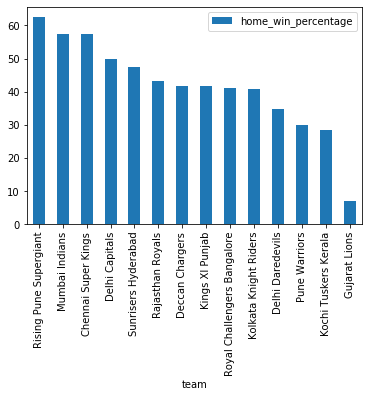

In [44]:
plt.figure(figsize=(15,10))
home_wins.sort_values('home_win_percentage',ascending=False).plot.bar(x='team',y='home_win_percentage')
plt.show()

- From the above graph, we can say that `Rising Pune Supergiant` is the most successful team, when playing in home condition

#### **10. Most successful team in away condition**

In [41]:
away_wins=home_and_away[['team','away_win_percentage']]
away_wins.sort_values('away_win_percentage',ascending=False)

,team,away_win_percentage
13,Gujarat Lions,75.000000
3,Delhi Capitals,70.000000
2,Chennai Super Kings,65.333333
0,Rising Pune Supergiant,62.500000
4,Sunrisers Hyderabad,62.222222
9,Kolkata Knight Riders,61.052632
1,Mumbai Indians,59.302326
5,Rajasthan Royals,57.500000
12,Kochi Tuskers Kerala,57.142857
7,Kings XI Punjab,51.764706


<Figure size 1080x720 with 0 Axes>

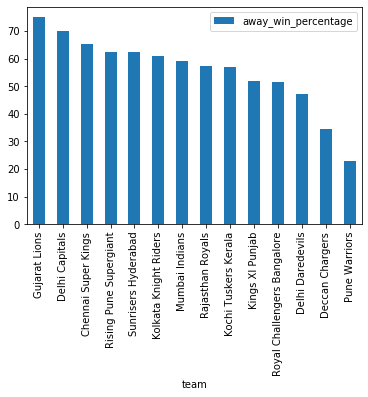

In [45]:
plt.figure(figsize=(15,10))
away_wins.sort_values('away_win_percentage',ascending=False).plot.bar(x='team',y='away_win_percentage')
plt.show()

- From the above graph, we can say that `Gujarat Lions` is the most successful team, when playing in away condition

#### **11. Most Runs scored by batters (Top 10)**

In [46]:
runs_avg_strikerate.sort_values('total_runs',ascending=False).head(10)

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999
9,G Gambhir,4219,134,3400,31.485075,124.088235


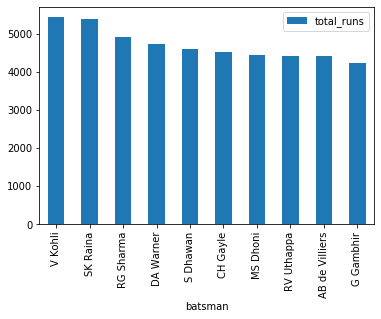

In [47]:
runs_avg_strikerate.sort_values('total_runs',ascending=False).head(10).plot.bar(x='batsman',y='total_runs')

- We find that **Virat Kohli** is the player that scores the highest number of runs, with the strikerate of 131.987351.

# ***Team Specific Analysis***

- Here, I will be picking some teams randonly, say `Mumbai Indians` and `Royal Challengers Bangalore` and doing few analysis on them.

In [48]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### 1. Mumbai Indians

In [56]:
mumbai= delivery[delivery['inning']==3]
mumbai.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
8092,34,3,Mumbai Indians,Gujarat Lions,1,1,JC Buttler,KA Pollard,JP Faulkner,1,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8093,34,3,Mumbai Indians,Gujarat Lions,1,2,KA Pollard,JC Buttler,JP Faulkner,1,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8094,34,3,Mumbai Indians,Gujarat Lions,1,3,KA Pollard,JC Buttler,JP Faulkner,1,...,0,0,0,0,6,0,6,NaN,NaN,NaN
8095,34,3,Mumbai Indians,Gujarat Lions,1,4,KA Pollard,JC Buttler,JP Faulkner,1,...,0,0,0,0,0,0,0,KA Pollard,caught,AJ Finch
8096,34,3,Mumbai Indians,Gujarat Lions,1,5,JC Buttler,RG Sharma,JP Faulkner,1,...,0,0,0,0,0,0,0,JC Buttler,caught,Ishan Kishan
29279,126,3,Kolkata Knight Riders,Rajasthan Royals,1,1,CH Gayle,BB McCullum,Kamran Khan,1,...,0,0,0,0,1,0,1,NaN,NaN,NaN
29280,126,3,Kolkata Knight Riders,Rajasthan Royals,1,2,BB McCullum,CH Gayle,Kamran Khan,1,...,0,0,0,0,1,0,1,NaN,NaN,NaN
29281,126,3,Kolkata Knight Riders,Rajasthan Royals,1,3,CH Gayle,BB McCullum,Kamran Khan,1,...,0,0,0,0,0,1,1,NaN,NaN,NaN
29282,126,3,Kolkata Knight Riders,Rajasthan Royals,1,4,CH Gayle,BB McCullum,Kamran Khan,1,...,0,0,0,0,4,0,4,NaN,NaN,NaN
29283,126,3,Kolkata Knight Riders,Rajasthan Royals,1,5,CH Gayle,BB McCullum,Kamran Khan,1,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [57]:
mumbai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 8092 to 176931
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          50 non-null     int64 
 1   inning            50 non-null     int64 
 2   batting_team      50 non-null     object
 3   bowling_team      50 non-null     object
 4   over              50 non-null     int64 
 5   ball              50 non-null     int64 
 6   batsman           50 non-null     object
 7   non_striker       50 non-null     object
 8   bowler            50 non-null     object
 9   is_super_over     50 non-null     int64 
 10  wide_runs         50 non-null     int64 
 11  bye_runs          50 non-null     int64 
 12  legbye_runs       50 non-null     int64 
 13  noball_runs       50 non-null     int64 
 14  penalty_runs      50 non-null     int64 
 15  batsman_runs      50 non-null     int64 
 16  extra_runs        50 non-null     int64 
 17  total_runs 

#### i. Batsman who gets the chance to bat the most

In [55]:
mumbai['batsman'].value_counts()

CH Gayle           8
CL White           5
SE Marsh           5
AB de Villiers     4
RR Pant            4
SK Raina           3
MK Pandey          3
KA Pollard         3
JC Buttler         2
NLTC Perera        2
Shakib Al Hasan    2
JA Morkel          1
GJ Maxwell         1
SS Iyer            1
Mohammad Nabi      1
BB McCullum        1
SA Yadav           1
DA Miller          1
MJ Guptill         1
ML Hayden          1
Name: batsman, dtype: int64

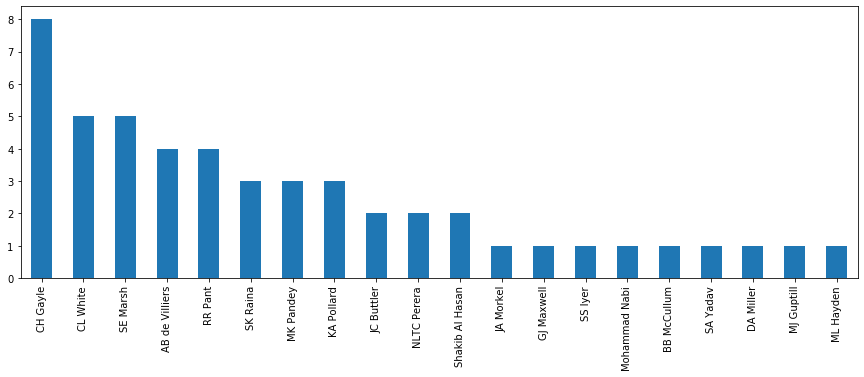

In [72]:
plt.figure(figsize=(15,5))
mumbai['batsman'].value_counts().plot.bar()

- We can observe that **Chris Gayle** gets to bat the most, when batting team was MI

#### ii. Types of dismissal in the batch when `MI` bats

In [73]:
mumbai['dismissal_kind'].value_counts()

caught     4
run out    3
bowled     1
lbw        1
Name: dismissal_kind, dtype: int64

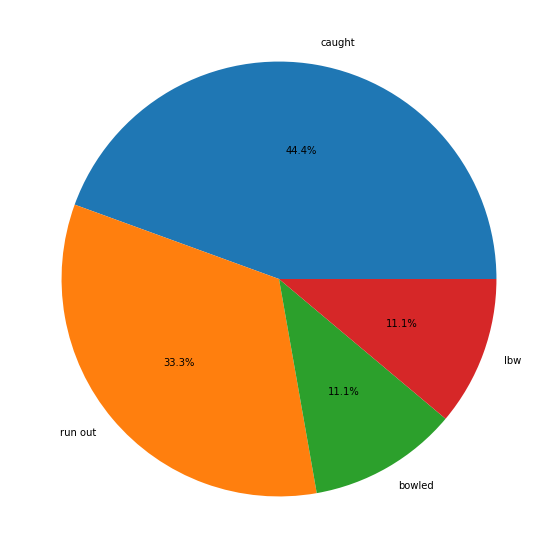

In [74]:
plt.figure(figsize=(15,10))
plt.pie(list(mumbai['dismissal_kind'].value_counts()), labels= list(mumbai['dismissal_kind'].value_counts().keys()),
        autopct='%0.1f%%')
plt.show()

- We can see that 44.4% of the times, the player was dismissed due to `catch` of the ball.
- 33% of the reason for batsman dismissal is `run out`.
- Reamaining 22.2% is divided equally as `LBW` and `clean bowled`, as the reason for player dismissal.

### 2. Royal Challengers Bangalore

In [100]:
rcb= delivery[delivery['inning']==2]
rcb.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


#### i. Batsman who gets the chance to bat the most

In [104]:
rcb['batsman'].value_counts()[0:10]

G Gambhir     2116
RV Uthappa    1981
V Kohli       1978
RG Sharma     1710
SK Raina      1705
AM Rahane     1581
S Dhawan      1576
DA Warner     1535
JH Kallis     1438
MS Dhoni      1425
Name: batsman, dtype: int64

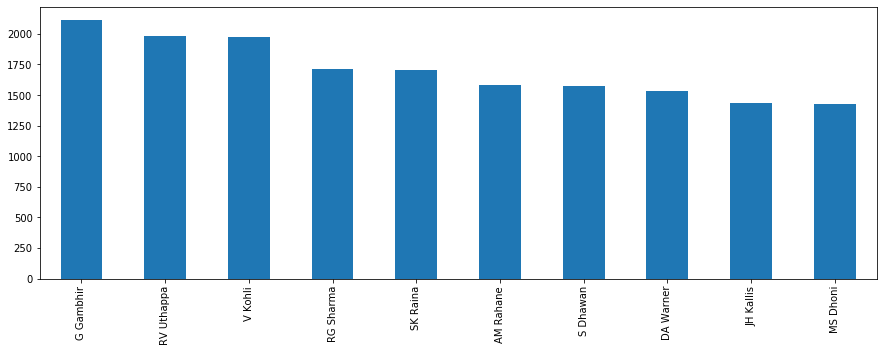

In [103]:
plt.figure(figsize=(15,5))
rcb['batsman'].value_counts().head(10).plot.bar()

- We can observe that **Gautam Gambhir** gets to bat the most, when batting team was RCB.

#### ii. Types of dismissal in the batch when `RCB` bats

In [105]:
rcb['dismissal_kind'].value_counts()

caught                   2553
bowled                    777
run out                   354
lbw                       268
stumped                   145
caught and bowled         106
retired hurt                7
hit wicket                  4
obstructing the field       2
Name: dismissal_kind, dtype: int64

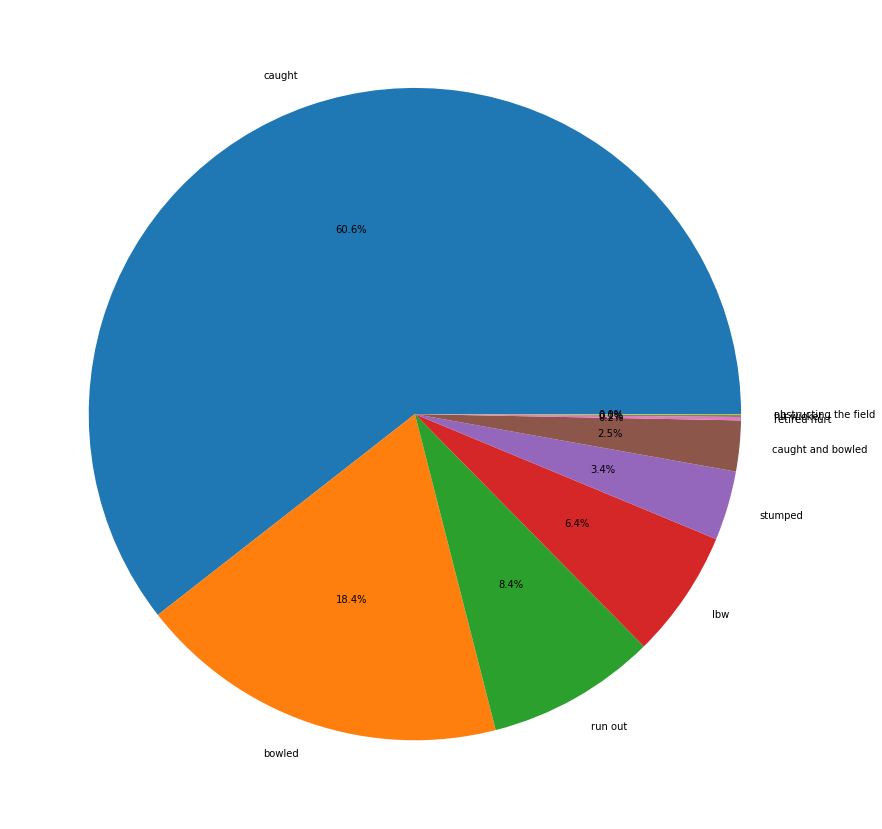

In [107]:
plt.figure(figsize=(15,15))
plt.pie(list(rcb['dismissal_kind'].value_counts()), labels= list(rcb['dismissal_kind'].value_counts().keys()),
        autopct='%0.1f%%')
plt.show()

- We can see that 60.6% of the time, player was dismissed when there was `catch` of the ball.
- The least reason for player dismissal was `obstructing the field`.